# **Title: Analyzing Regional Apple Product Sales and Service Revenue Trends in 2024**

## 1. Objectives:

- To evaluate the performance of Apple product sales across different regions in 2024, focusing on iPhones, iPads, Macs, Wearables, and Services Revenue.
- To identify regional variations in product sales and revenue generation.
- To provide insights into which product categories perform best in specific regions and countries.

## 2. Import the required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 3. Load the dataset

In [2]:
# Load the dataset
file_path = "/Apple Sales 2024/Dataset/apple_sales_2024.csv"
df = pd.read_csv(file_path)

# Display first 5 rows
print("First 5 rows of the dataset:")
print(df.head())

# Display last 5 rows
print("\nLast 5 rows of the dataset:")
print(df.tail())

First 5 rows of the dataset:
       State         Region  iPhone Sales (in million units)  \
0  Chongqing  Greater China                             7.46   
1    Germany         Europe                             8.63   
2         UK         Europe                             5.61   
3   Shanghai  Greater China                             7.82   
4   Thailand   Rest of Asia                            16.70   

   iPad Sales (in million units)  Mac Sales (in million units)  \
0                           6.75                          1.19   
1                          14.06                          7.03   
2                          14.09                          8.78   
3                           7.97                          9.78   
4                           8.13                          6.46   

   Wearables (in million units)  Services Revenue (in billion $)  
0                          5.88                            15.88  
1                          7.42                        

## 4. Data Cleaning and Preprocessing

### a. Check for missing value

In [3]:
# Check for missing value
missing_value = df.isna().sum()

# Display column with missing value
if missing_value.any():
    print("There are missing values in the dataset.")
    print("\nMissing values per column:")
    print(missing_values)
else:
    print("No missing values founr in the dataset.")

No missing values founr in the dataset.


### b. Check for duplicate rows

In [4]:
# Check for duplicate rows
duplicates = df.duplicated()

# Display if there are any duplicates
if duplicates.any():
    print("There are duplicate rows in the dataset.")
    print(f"Total duplicate rows: {duplicates.sum()}")
    
    # Display the duplicate rows
    print("\nDuplicate rowa:")
    print(data[duplicates])

else: print("No duplicates roes found in the dataset.")

No duplicates roes found in the dataset.


### c. Check Data types

In [5]:
print("Data types of each column:")
print(df.dtypes)

Data types of each column:
State                               object
Region                              object
iPhone Sales (in million units)    float64
iPad Sales (in million units)      float64
Mac Sales (in million units)       float64
Wearables (in million units)       float64
Services Revenue (in billion $)    float64
dtype: object


### d. Conclusion

The dataset appears to be clean with no missing values, duplicate rows and the data types are as expected

## 5. Descriptive Statistical Analysis

### a. Dataset Overview

In [6]:
data_description = df.describe()

print(data_description)

       iPhone Sales (in million units)  iPad Sales (in million units)  \
count                      1000.000000                    1000.000000   
mean                         17.444500                       8.565880   
std                           7.180077                       3.735994   
min                           5.030000                       2.020000   
25%                          11.447500                       5.432500   
50%                          17.130000                       8.695000   
75%                          23.715000                      11.740000   
max                          29.940000                      14.990000   

       Mac Sales (in million units)  Wearables (in million units)  \
count                   1000.000000                   1000.000000   
mean                       5.555760                      6.935500   
std                        2.506491                      2.951677   
min                        1.010000                      2.000000 

Key Insights:
- iPhone Sales: Range between 5.03M and 29.94M units, with an average of 17.44M units.
- iPad Sales: Range between 2.02M and 14.99M units, with an average of 8.57M units.
- Mac Sales: Range between 1.01M and 9.99M units, averaging 5.56M units.
- Wearables: Range between 2M and 12M units, with an average of 6.94M units.
- Services Revenue: Range between 5.01B USD and 19.92B USD, with an average of $12.45B USD.

### b. Unit Sales and Service Revenue Analysis

**1. Regional analysis**
- Aggregate unit sales and service revenue by region to identify the highest and lowest performing regions.

In [7]:
# Aggregate sales and revenue by region
region_summary =df.groupby('Region').agg({
    'iPhone Sales (in million units)': 'sum',
    'iPad Sales (in million units)': 'sum',
    'Mac Sales (in million units)': 'sum',
    'Wearables (in million units)': 'sum',
    'Services Revenue (in billion $)': 'sum'
}).reset_index()

# Calculate the total sales and total revenue columns
region_summary['Total Sales(in million units)'] = (
    region_summary['iPhone Sales (in million units)'] +
    region_summary['iPad Sales (in million units)'] +
    region_summary['Mac Sales (in million units)'] +
    region_summary['Wearables (in million units)']
)
region_summary['Total Revenue (in billion $)'] = region_summary['Services Revenue (in billion $)']

# Add columns to identify highest and lowest performing regions
highest_sales_region = region_summary.loc[region_summary['Total Sales(in million units)'].idxmax(), 'Region']
lowest_sales_region = region_summary.loc[region_summary['Total Sales(in million units)'].idxmin(), 'Region']
highest_revenue_region = region_summary.loc[region_summary['Total Revenue (in billion $)'].idxmax(), 'Region']
lowest_revenue_region = region_summary.loc[region_summary['Total Revenue (in billion $)'].idxmin(), 'Region']

region_summary, highest_sales_region, lowest_sales_region, highest_revenue_region, lowest_revenue_region

(          Region  iPhone Sales (in million units)  \
 0         Europe                          3563.12   
 1  Greater China                          3868.28   
 2  North America                          3124.14   
 3   Rest of Asia                          3091.50   
 4  Rest of World                          3797.46   
 
    iPad Sales (in million units)  Mac Sales (in million units)  \
 0                        1745.66                       1111.22   
 1                        1862.95                       1212.80   
 2                        1625.44                       1028.96   
 3                        1473.26                        982.94   
 4                        1858.57                       1219.84   
 
    Wearables (in million units)  Services Revenue (in billion $)  \
 0                       1353.12                          2416.30   
 1                       1514.86                          2780.72   
 2                       1272.92                          2281.

Key Insights:

- Highest Performing Region (Unit Sales): Greater China (8,458.89 million units).
- Lowest Performing Region (Unit Sales): Rest of Asia (6,843.99 million units).
- Highest Performing Region (Services Revenue): Greater China (2,780.72 billion USD).
- Lowest Performing Region (Services Revenue): Rest of Asia (2,267.15 billion USD).

## 6. Data Visualization

In [8]:
# Set a consistent style for the plots
sns.set(style="whitegrid")

# Aggregated sales and revenue by region
region_aggregates = df.groupby("Region").sum()

### a. Total Unit Sales by Region

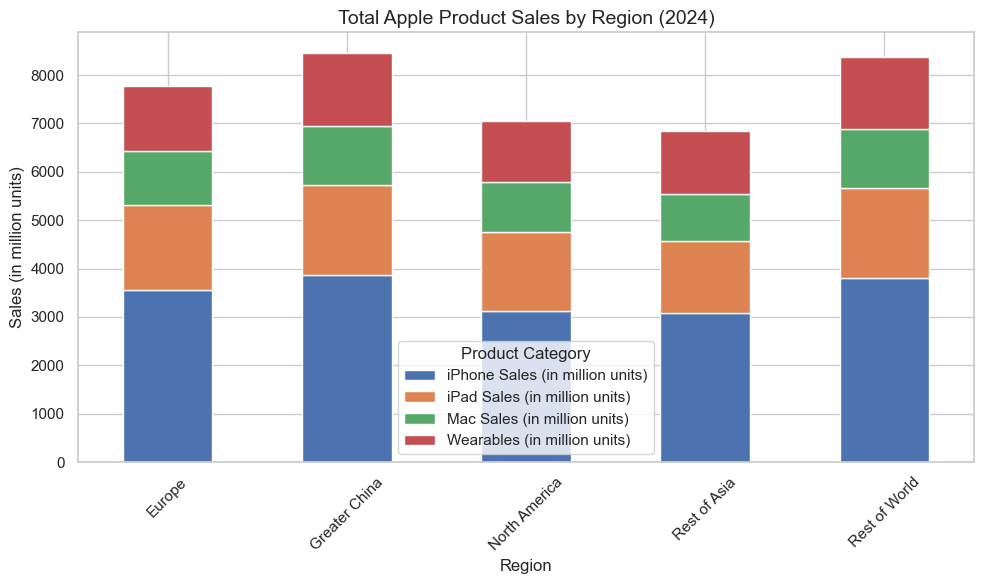

In [9]:
plt.figure(figsize=(10, 6))
region_aggregates[["iPhone Sales (in million units)", 
                   "iPad Sales (in million units)", 
                   "Mac Sales (in million units)", 
                   "Wearables (in million units)"]].plot(kind="bar", stacked=True, ax=plt.gca())
plt.title("Total Apple Product Sales by Region (2024)", fontsize=14)
plt.ylabel("Sales (in million units)", fontsize=12)
plt.xlabel("Region", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Product Category")
plt.tight_layout()
plt.show()

**Total Apple Product Sales by Region (2024):**
A stacked bar chart displaying the sales of iPhones, iPads, Macs, and Wearables across regions.

### b. Services Revenue by Region

/var/folders/vb/ytm93ccd3gq849j_4k96z4tm0000gn/T/ipykernel_4122/3046674727.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


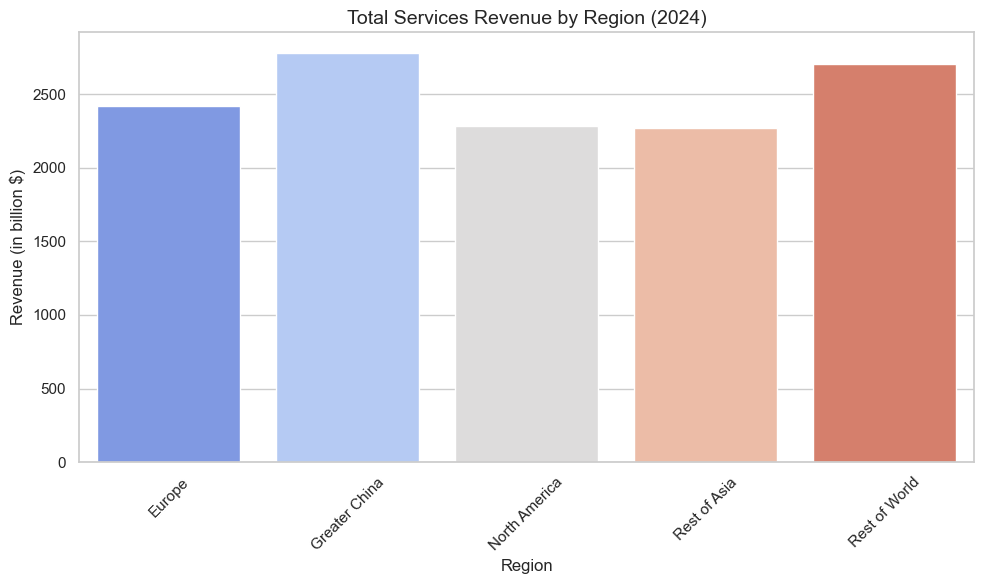

In [10]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x=region_aggregates.index, 
    y=region_aggregates["Services Revenue (in billion $)"], 
    palette="coolwarm", 
    hue=None,  
    legend=False  
)
plt.title("Total Services Revenue by Region (2024)", fontsize=14)
plt.ylabel("Revenue (in billion $)", fontsize=12)
plt.xlabel("Region", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Total Services Revenue by Region (2024):**
A bar chart highlighting the total revenue generated from services in each region.

### c. Correlation Heatmap for Product Sales and Revenue

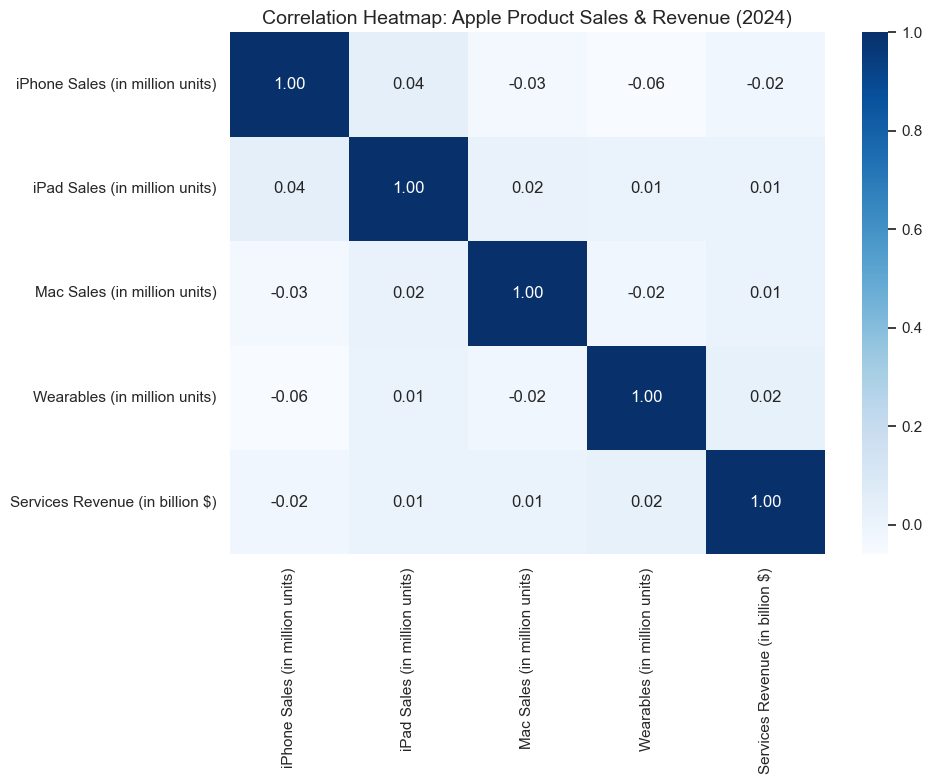

In [11]:
plt.figure(figsize=(10, 8))
correlation = df.iloc[:, 2:].corr()  # Exclude categorical columns
sns.heatmap(correlation, annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Heatmap: Apple Product Sales & Revenue (2024)", fontsize=14)
plt.tight_layout()
plt.show()

**Correlation Heatmap:**
A heatmap showing the correlations between different product sales and service revenue to uncover potential relationships.

### d. Distribution of iPhone Sales

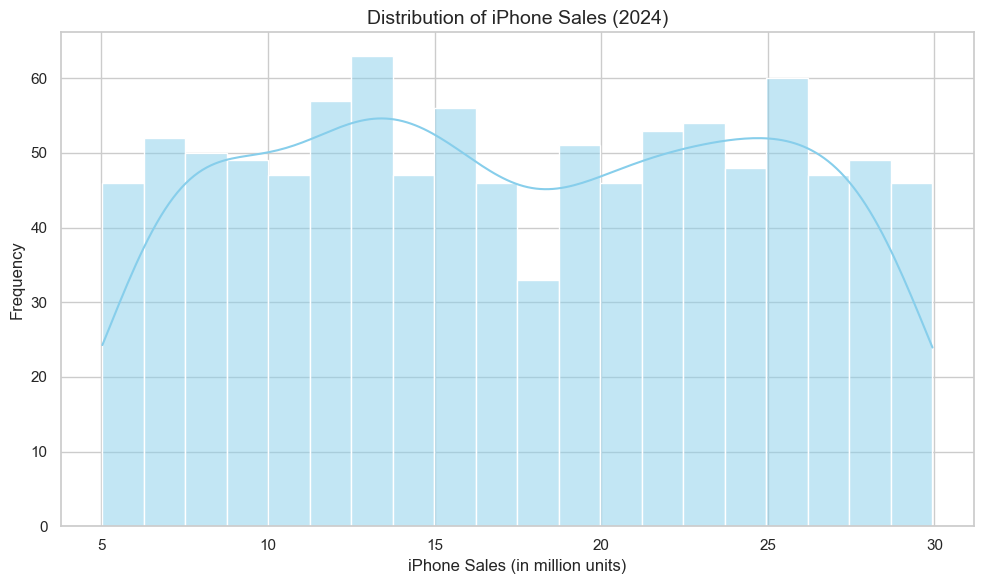

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(df["iPhone Sales (in million units)"], kde=True, color="skyblue", bins=20)
plt.title("Distribution of iPhone Sales (2024)", fontsize=14)
plt.xlabel("iPhone Sales (in million units)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.tight_layout()
plt.show()

**Distribution of iPhone Sales (2024):**
A histogram with a KDE (Kernel Density Estimate) curve illustrating the distribution of iPhone sales.